In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import os
import nltk.corpus
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [4]:
# read result 
result = pd.read_csv("result.csv") 
Tags = result["Tag"]
Tags

0       ['DNS', 'Network Administration', 'System Admi...
1       ['Article Writing', 'Book Writing', 'eBooks', ...
2       ['Blog Install', 'Computer Science', 'PHP', 'W...
3       ['English (US)', 'Simplified Chinese (China)',...
4       ['Java', 'JavaFX', 'Software Architecture', 'S...
                              ...                        
9867    ['Android', 'Asterisk PBX', 'Mobile App Develo...
9868    ['Bulk Marketing', 'Data Entry', 'Leads', 'Tel...
9869    ['Facebook Marketing', 'Google Plus', 'Pintere...
9870    ['Academic Advising', 'Academic Research', 'Ec...
9871    ['Electrical Engineering', 'Engineering', 'Sof...
Name: Tag, Length: 9872, dtype: object

In [5]:
allTag = []
for row in result.index: 
    list1 = list(map(str, result['Tag'][row].replace('[','').replace(']','').replace('\'','').split(',')))
    for x in list1: 
        allTag.append(x.replace(' ', ''))


In [6]:
# find most popular 20tag 
# token = word_tokenize(allTag)
token = allTag
fdist = FreqDist(token)
fdist20 = fdist.most_common(20)
fdist20

[('GraphicDesign', 2225),
 ('PHP', 2145),
 ('WebsiteDesign', 1742),
 ('HTML', 1505),
 ('Photoshop', 976),
 ('LogoDesign', 967),
 ('MobileAppDevelopment', 857),
 ('Illustrator', 759),
 ('WordPress', 757),
 ('JavaScript', 756),
 ('Android', 704),
 ('SoftwareArchitecture', 660),
 ('DataEntry', 581),
 ('MySQL', 493),
 ('Excel', 492),
 ('CSS', 469),
 ('ArticleWriting', 466),
 ('InternetMarketing', 432),
 ('iPhone', 403),
 ('ContentWriting', 399)]

In [7]:
import matplotlib.pyplot as plt

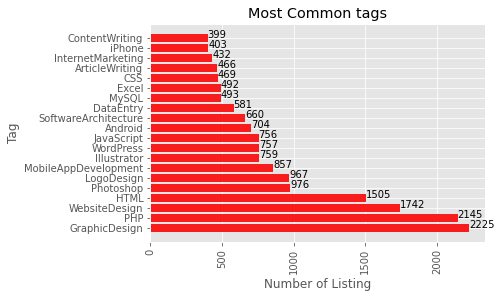

In [8]:
plt.style.use('ggplot')

x = []
count = []
for i in range(len(fdist20)): 
    x.append(fdist20[i][0])
    count.append(fdist20[i][1])

x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, count, color = '#f81c1c')
for index, value in enumerate(count):
    plt.text(value, index, str(value))

plt.xticks(rotation=90)
plt.ylabel("Tag")
plt.xlabel("Number of Listing")
plt.title("Most Common tags")

plt.yticks(x_pos, x)

plt.show()

In [9]:
# clean up price
price = result["Price/Budget"]
price = price.str.replace('Avg Bid', '')

for i in range(len(price)): 
    price[i] = price[i].replace('$', '')
    # handel range price
    if '-' in price[i]: 
        a,b = price[i].split('-')
        if '/ hr' in a: 
            a = float(a.replace('/ hr', '')) 
            # * 40
        else: 
            a = float(a)
        if '/ hr' in b: 
            b = float(b.replace('/ hr', '')) 
            # * 40
        else: 
            b = float(b)
        price[i] = (a+b)/2
    else: 
        if 'min' in price[i] or '/ hr' in price[i]: 
            price[i] = price[i].replace('min', '')
            price[i] = float(price[i].replace('/ hr', '')) 
            # * 40
        price[i] = float(price[i])
totalPrice = sum(price)
averagePrice = price.mean()
averagePrice

14475.328302269043

In [10]:
# get bid weighted average price 
Bids = result["Bids/Entries"]
Bids = Bids.str.replace(' bids', '').str.replace(' entries', '')
Bids = Bids.astype(int)
sumBids = sum(Bids)
bidWeight = Bids.map(lambda x : x/sumBids)
bidWeight

0       0.000000
1       0.000013
2       0.000000
3       0.000026
4       0.000000
          ...   
9867    0.000006
9868    0.000126
9869    0.000052
9870    0.000048
9871    0.000045
Name: Bids/Entries, Length: 9872, dtype: float64

In [11]:
# get tag frequency weight
total = 0
dictFdist = dict(fdist)
for x in dictFdist: 
    total += dictFdist[x]
for x in dictFdist: 
    dictFdist[x] = (dictFdist[x]/total)
freqWeight = dictFdist

In [12]:
# get total weighted value of each tag 
labels = {}
for i in range(len(price)): 
    list1 = list(map(str, result['Tag'][i].replace('[','').replace(']','').replace('\'','').split(',')))
    for x in list1: 
        x = x.replace(' ','')
        # priceWeight = price[i] * bidWeight[i]
        if x not in labels:
            labels[x] = float(0)
        else: 
            labels[x] += (price[i] * freqWeight[x] * bidWeight[i])

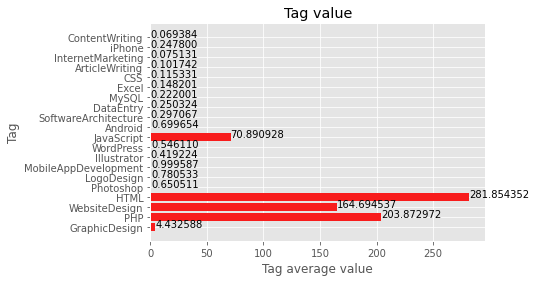

In [13]:
# tag value index 
plt.style.use('ggplot')

x = []
count = []
for i in range(len(fdist20)): 
    key = fdist20[i][0]
    x.append(key)
    count.append(labels[key])

x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, count, color = '#f81c1c')
for index, value in enumerate(count):
    plt.text(value, index, str("{:.6f}".format(value)))

plt.ylabel("Tag")
plt.xlabel("Tag average value")
plt.title("Tag value")

plt.yticks(x_pos, x)

plt.show()

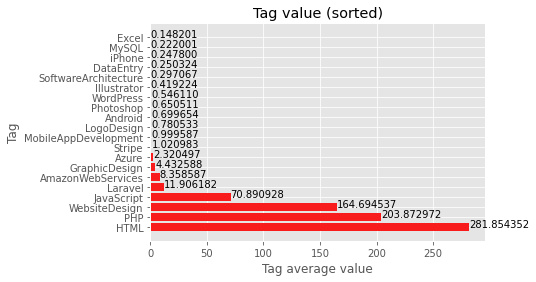

In [14]:
# sorted tag value index
labels = sorted(labels.items(), key=lambda x: x[1], reverse=True)

plt.style.use('ggplot')

x = []
count = []
for i in range(0, 20): 
    key = list(labels)[i][0]
    x.append(key)
    count.append(dict(labels)[key])

x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, count, color = '#f81c1c')
for index, value in enumerate(count):
    plt.text(value, index, str("{:.6f}".format(value)))

plt.ylabel("Tag")
plt.xlabel("Tag average value")
plt.title("Tag value (sorted)")

plt.yticks(x_pos, x)

plt.show()